# Final Exam {-}

**Notes:**

1. You have 3 hours to do the exam.  Your solution must be uploaded to Canvas (exactly as is done for the prelabs and labs) as a notebook file with its name unchanged. **Late exams will not be accepted.**   A little bit of extra time has been allotted on Canvas for you to turn it in before it will claim the exam is late. This is meant to insure that you have a full 3 hours to work on the exam, and then a little bit of time to turn in it. It is not extra time to work on the exam!
2. You must work on the exam yourself.  It must all be your work.  You are free to use whatever resources you wish except other people.  I am trying to be flexible in terms of when people can work on this portion of the exam.  This means different students will be working on the exam at different times.  **Do not discuss the exam with other students until everyone has completed it.**
3. The exam is meant to be completed in the allotted time.  I may have misjudged the amount of time the questions will take.  Keep in mind that everyone is in the same situation as yourself.  If the exam is too long everyone will suffer similarly and I will take that into account when assigning grades.  It is best to look at all the problems and do as much work as you can starting with the problem you are most comfortable with.
4. The points for each problem is given below.  You can use this information to decide how to apportion your time working on the problems.
5. When I ask for descriptions include all the information you think is relevant to convince me that (a) you know how to solve the problem, and (b) can be used to reproduce the results if someone else in the class were given the description.  The more clear these descriptions are the better chance I have in understanding what you have done and assigning partial credit. When making nice plots you must follow all the good practices discussed and used in the labs.
6. **Read the questions carefully.** There is important information given in various places in various parts of the problem.  Do not skip reading sections, even if they are very small.

## Initialization {-}

Collect all your initialization here.

In [1]:
#INITIALIZATION

import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interp
import scipy.optimize as opt
import matplotlib as mpl
import scipy.special as sf
import scipy.integrate as integ
import scipy.linalg as la

mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)

#if using random numbers
rng = np.random.default_rng()

# 1. Angular Diameter Distance (20 points)

Distances to remote objects can be measured in various ways.
For example, using how the intensity falls off with distance or how the angular size of an object decreases with distance.
In static Euclidean space these ways of defining distance are all the same.
In an expanding universe they are not!
Here we will only consider the angular diameter distance.

Suppose we know the size of some object, $\ell$ (a so-called standard ruler).
Let $\theta$ be its observed angular size (in radians, of course).
With this we can define the angular diameter distance as
$$ D_A = \frac{\ell}{\theta}. $$
How this can be calculated in an expanding universe is well known.
Long before tools existed that compute this for us (for example in [Astropy](https://www.astropy.org/)) we had to implement the numerical computation of these ourselves.
Fortunately, David Hogg compiled the list of all relevant quantities in a consistent notation in a nice posting on [arxiv.org](https://arxiv.org/abs/astro-ph/9905116).
It is still a very useful reference and we will follow his notation here.

The basic ideas and equations are the same as those we used in fitting the type Ia supernova data in Lab09.
Let $D_H$ be the Hubble distance.
We will perform all our computations in units of $D_H$ so we do not need to specify a form for it (see Lab09).
The total line-of-sight comoving distance to an object from our location at $z=0$ to its location at redshift $z$ is
$$ \frac{D_C(z)}{D_H} = \int_{0}^{z} \frac{\mathrm{d} z'}{E(z')}, $$
where
$$ E(z) \equiv \sqrt{\Omega_M (1+z)^3 + \Omega_k (1+z)^2 + \Omega_\Lambda}. $$
This is a little different from the case considered in Lab09.
Here we include matter, $\Omega_M$, a cosmological constant, $\Omega_\Lambda$, and curvature, $\Omega_k$.
Notice that we do not allow for evolving dark energy and do not restrict ourselves to a flat universe.
(We are also ignoring radiation which would become important at much larger redshifts than we will consider here.)
With these choices we also have the condition that
$$ \Omega_M + \Omega_k + \Omega_\Lambda = 1. $$
We thus only need to specify two of these quantities and the third can be calculated.
In this work we will specify $\Omega_M$ and $\Omega_k$, from which $\Omega_\Lambda$ can be deduced.

With this we can compute the transverse comoving distance between two objects at the same redshift
$$ \frac{D_M(z)}{D_H} = \begin{cases}
    \frac{1}{\sqrt{\Omega_k}} \sinh\!\left(\sqrt{\Omega_k} D_C / D_H \right), & \Omega_k > 0, \\
    D_C / D_H, & \Omega_k = 0, \\
    \frac{1}{\sqrt{|\Omega_k|}} \sin\!\left(\sqrt{|\Omega_k|} D_C / D_H \right), & \Omega_k < 0.
\end{cases} $$
Notice that the form of the equation depends on the curvature.
Also notice that given $D_C/D_H$ we can compute all three cases.

Finally from all of this, the angular diameter distance is calculated as
$$ \frac{D_A(z)}{D_H} = \frac{1}{1+z} \frac{D_M(z)}{D_H}. $$

An interesting and counterintuitive property of the angular diameter distance is that it has a maximum.
After some redshift it starts *decreasing*, meaning that there is a smallest angular size for objects of fixed linear size.
We will verify this, find the redshift at which the angular diameter distance is a maximum, and its value.

In principle we would like to write a function that, given $\Omega_M$, $\Omega_k$, and an array of $z$, it returns the angular diameter distance.
In practice this is not so simple since the transverse comoving distance $D_M(z)$ has different functional forms for different curvatures.
Thus, you only need to implement functions required to calculate the line-of-sight comoving distance $D_C(z)$, and the support function for the integrand.
As in Lab09, it is more convenient to define a function that returns the inverse of $E$.
Fill in the two required functions below.
Note that we can include the calculation of $\Omega_\Lambda$ in the `Einv` function.
Recall that `z` is an array of $z$ values, not a single value, so `DC` must return an array of values.

We have seen that there are a few ways to "vectorize" a function that involves an integral.
Here we can use `quad_vec`, `vectorize`, or, grudgingly, in this case, you can use a loop.

You *can* define more functions if you prefer.
Otherwise $D_M$ and $D_A$ can be calculated "by hand" for the cases we will consider.
To test your code calculate the angular diameter distance for a closed universe with $\Omega_M = 0.3$ and $\Omega_k=-0.55$ for an array of $z$ values from 0 to 6 in steps of 0.1.
Produce a quick plot of this result.
It should exhibit the strange behavior noted above.


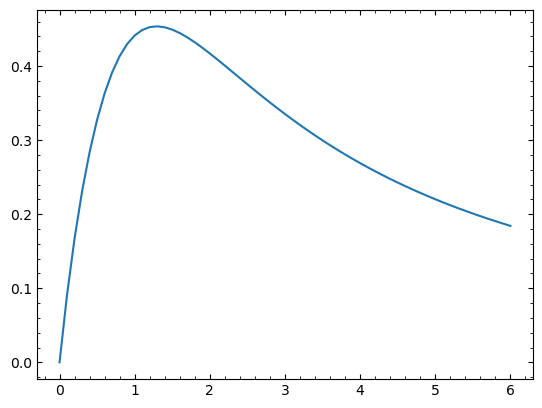

In [82]:
def Einv(z, OmegaM, Omegak):
    OmegaL = 1-OmegaM-Omegak
    radicand = OmegaM*(1+z)**3+Omegak*(1+z)**2+OmegaL
    return 1/(np.sqrt(radicand))

def DC(z, OmegaM, Omegak):
    outs = np.zeros_like(z)
    for i in range(len(z)):
        outs[i]=integ.quad(Einv, 0,z[i], args=(OmegaM, Omegak,))[0]
    return outs

def DM(z, dc, OmegaK):
    if OmegaK > 0:
        root = np.sqrt(OmegaK)
        return (1/root)*np.sinh(root*dc)
    elif OmegaK==0:
        return dc
    elif OmegaK < 0:
        root = np.sqrt(np.abs(OmegaK))
        return (1/root)*np.sin(root*dc)
    
def DA(z, dm):
    return (1/(1+z))*dm

om = .3
ok = -.55
zs=np.arange(0,6.1,.1)

dc=DC(zs, om, ok)
dm=DM(zs, dc, ok)
da=DA(zs, dm) 

plt.plot(zs, da)

Now that we have code to calculate the angular diameter distance we will use it for three model universes: a closed universe (the test case above), a flat universe, and an open universe.
The parameters for these cases are given in the following table:
| Type | $\Omega_M$ | $\Omega_k$ |
|:------|:------|------:|
|Closed| 0.3 | -0.55 |
|Flat | 0.3 | 0.00 |
|Open | 0.3 | 0.55 |

For each of these we will determine the redshift at which the angular diameter distance is a maximum and the value of this maximum distance.
Given an array of redshifts `z` and the corresponding (already computed) array of angular diameter distances `dA`, **accurately** determine the redshift and value of the maximum angular diameter distance.
Write the function `find_DA_max` which returns these values.

To put everything together, first use your above code to compute the angular diameter distance for each case for the same array of redshifts as in the test case.
Use these along with `find_DA_max` to find $z_{\mathrm{max}}$ and $D_{A,\mathrm{max}}/D_H$ for the three universes.
Print these values (clearly identified).
Also produce a nice plot of $D_A/D_H$ versus $z$ for the three universes.
Include in this plot a vertical line at $z_{\mathrm{max}}$ for each universe.
(You do not need to label these lines, but it should be clear which universe they correspond to, how can you make this visually clear?)

Text(0.5, 1.0, 'Angular Diameter Distance vs Redshift for Various Cosmologies')

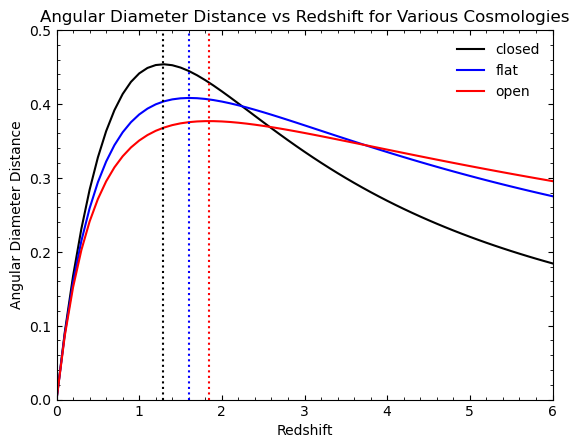

In [87]:
om=.3
ok1=-.55
ok2=0.
ok3=.55
zs=np.arange(0,6.1,.1)

#horribly inelegant but here we are
dc1=DC(zs, om, ok1)
dm1=DM(zs, dc1, ok1)
da1=DA(zs, dm1) 

dc2=DC(zs, om, ok2)
dm2=DM(zs, dc2, ok2)
da2=DA(zs, dm2) 

dc3=DC(zs, om, ok3)
dm3=DM(zs, dc3, ok3)
da3=DA(zs, dm3) 

def find_DA_max(z, dA):
    badest=z[np.argmax(dA)]
    bounds=(badest-1, badest+1)
    s = interp.make_interp_spline(z, dA)
    deriv = s.derivative(nu=1)
    maxval = opt.brentq(deriv, bounds[0], bounds[1])
    return maxval

one=find_DA_max(zs, da1)
two=find_DA_max(zs, da2)
three=find_DA_max(zs, da3)

fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(zs, da1, c='k', label='closed')
ax.plot(zs, da2, c='b', label='flat')
ax.plot(zs, da3, c='r', label='open')
ax.axvline(one, ls=":", c='k')
ax.axvline(two, ls=":", c='b')
ax.axvline(three, ls=":", c='r')
ax.set_xlim(0,6)
ax.set_ylim(0,.5)
ax.legend(frameon=False)
ax.set_xlabel('Redshift')
ax.set_ylabel('Angular Diameter Distance')
ax.set_title('Angular Diameter Distance vs Redshift for Various Cosmologies')

# 2. PCA: Principal Component Analysis (20 points)

PCA is a standard statistical technique that now is a staple of machine learning.
It provides a means of data compression and finding correlations in potentially large, heterogeneous data sets.
Here we will explore the ideas using a simple [toy example](https://marcioodwyer.wordpress.com/2019/01/09/principal-component-analysis-a-toy-example/) written by a former graduate student here at Case, Marcio O'Dwyer, as he was preparing for a career in data science (he is now a senior engineer at Yelp).
Naturally we will modify his approach (we do not have to impress people with fancy sounding machine learning jargon).

The basic idea is to suppose we make noisy measurements of the position of an object.
For example, if we separately measure the $x$, $y$, and $z$ positions of an oscillator, can we determine that it is oscillating along a line?
In other words, by measuring the position of an object that happens to be an arbitrarily oriented harmonic oscillator, can we determine that it is moving along a line and find this line?
This should sound a lot like finding a principal axis ....
(It is!)

To explore this we will proceed as follows.
1. Generate a random orientation for the harmonic oscillator.
2. Generate random measurements of the oscillator with noise.
3. Construct the covariance matrix.
4. Find the principal axes of the covariance matrix.

## Random Direction

Generating a random direction means generating a randomly oriented unit vector.
This is the same as generating a random point on the surface of a sphere.
In three dimensions we know how to do this from Homework 11, however, this can easily be done in $n$ dimensions.
The elegant algorithm given by Marsaglia (see the [Wikipedia N-sphere](https://en.wikipedia.org/wiki/N-sphere) article for more details) is to generate $n$ Gaussian distributed numbers with zero mean and then normalize.
This will be a random point on the $n-1$-sphere and thus a randomly oriented unit vector in $n$ dimensions.
The variance of the Gaussian distribution is irrelevant (since we normalize the vector) so we might as well just use the standard Gaussian with zero mean and unit variance.
Although we only need this in three dimensions, implement the general algorithm below.
This function only needs to generate a single unit vector (it would be better to do more, but this is sufficient for our needs).
Notice that we pass in the number of dimensions `ndim` and a random generator `rng`.

In [61]:
def generate_unit_vector(ndim, rng):
    #doing this in 3 dimensions based on the homework because i have no clue whats being asked of us here
    u=rng.random(ndim)
    r=np.zeros_like(u)
    r[0]=u[0]**(1/3)
    r[1]=np.arccos(1-2*u[1])
    r[2]=2*np.pi*u[2]
    return r

## Random Data

We will consider random noisy measurements of a harmonic oscillator.
Let $\hat{v}$ be the direction along which the oscillator moves.
At any time the position of the oscillator relative to its equilibrium point is
$$ \vec{x}(t) = A \hat{v} \cos(\omega t) + \vec{n}, $$
where $A$ is the amplitude, $\omega$ is the angular frequency, and $\vec{n}$ is the measurement noise in each position component.
(We could also include an arbitrary phase but it is not needed and does not change the approach.)

We will generate $N$ observations based on a given amplitude $A$, angular frequency $\omega$, direction $\hat{v}$, and treat the measurement noise as a Gaussian with variance $\sigma$ (assumed to be the same for all components of the measured position).
We will also choose the times of observations as $N$ random, uniformly distributed values from $t=0$ to $5$ times the period of oscillation.

Write a function to generate the random data.
Note that this can be done without loops, of course.
To do this, first generate a random direction $\hat{v}$ using your function from the previous part.
This direction is passed into our data generation function.
(We will want to know the direction so we can compare to it later so we are doing it outside the data generation function.)
Within the function generate $N$ random times $t$.
To combine these to generate a $3\times N$ array you can use `np.outer` to compute an outer product, this will do what we want.
Next add Gaussian noise with variance $\sigma$ to all elements of the array.
Finally, we will want/need our data to be centered on zero.
Separately subtract the mean from each of the $x$, $y$, and $z$ components of the generated position data.
Again, all of this can be done with no loops!

In [ ]:
def generate_shifted_data(Ndata, vhat, amplitude, omega, sigma, rng):
# YOUR CODE HERE
raise NotImplementedError()
#i fear i cant begin to parse what "generate N random times t" means--am I generating t randomy N times? am i generating N random somethings and multiplying them
#by t? i hate leaving so much of this blank; i put a lot of work into this class over the course of the semester and thought i learned a lot and understood
#the material pretty well, and this feels like a very bad reflection of that :(

Let $\vec{x}_k = (x_k, y_k, z_k)$ be the components of the position from measurement $k$.
Since we have shifted the coordinates to have zero mean, the components of the covariance matrix between all pairs of components can be computed as
$$ C_{ij} = \langle x_i x_j \rangle = \frac{1}{N} \sum_{k=1}^{N} x_{i,k} x_{j,k}, $$
where $x_{0,k} = x_k$, $x_{1,k} = y_k$, and $x_{2,k} = z_k$.
Notice that this is a symmetric matrix.

Write a function that, given the data generated by `generate_shifted_data`, computes the covariance matrix.
This function must return a symmetric $3 \times 3$ matrix.

This calculation *can* be done without loops.
However, it can most easily be done either using broadcasting or `np.einsum`, topics we have not studied in detail, if at all.
For this function it is thus (again grudgingly) acceptable to either write out all the components by hand (only 6 are required due to symmetry) or to use one or two loops over $i$ and/or $j$ for the components of the correlation matrix.

In [ ]:
def compute_data_covariance(data):
# YOUR CODE HERE
raise NotImplementedError()

Generate 1000 random observations for a randomly oriented harmonic oscillator with an amplitude of 10, angular frequency 1.1, and measurement noise with $\sigma=3$.
From this data calculate the covariance matrix.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Now that we have a covariance matrix we can use it to determine the direction of oscillation.
This direction will be the principal axis of the covariance matrix with largest eigenvalue.
To find this, compute its eigenvalues and eigenvectors.
You will (must) find that the eigenvalues are real and positive.
Further, one of them will be noticeably larger than the others.
The eigenvector associated with the largest eigenvalue will be the direction of oscillation.
Print the randomly generated direction $\hat{v}$ along with the direction you find from the covariance matrix.
We should find they are fairly close.
(Note: Recall that the eigenvector is only defined up to a sign.
We want to print the eigevector with the same sign as $\hat{v}$.
This must be done generically since whenever we generate new random data, the relative signs can change.)

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

# 3. Newton's Gravitational Constant, $G$ (30 points)

The standard and recommended values for fundamental physical constants is [maintained by NIST](https://physics.nist.gov/cuu/Constants/index.html).
(When I last checked, this site was still available....)
The values are updated every four years and serve the essential role of providing consistent values for experimentally determined constants of nature.
The compilers of these values have the daunting task of combining results from multiple experiments that often disagree with each other.
They have a standardized procedure for combining these values, often using an approach that *should not be used in general*!
To understand this we will consider one of the earliest known, and yet least well determined, constants of nature: Newton's gravitational constant, $G$.
It has the benefit of being independent of other constants so can be studied on its own.

The 2022 recommended value is $G = 6.674 30 \times 10^{-11}\;\mathrm{m^3\, kg^{-1}\, s^{-2}}$ with a *relative uncertainty* $u_r = 2.2\times 10^{-5}$.
The uncertainty is assumed to be Gaussian and is related to the more standard 1-$\sigma$ (absolute) uncertainty via $\sigma_G = u_r G$.
The article giving full discussion of the [fundamental physical constants from 2022](https://arxiv.org/pdf/2409.03787v1) states that $G$ is unchanged from the previous release in 2018 and is based on 16 measurements.
These measurements are contained in Table XXX in the article and have been stored in ```https://raw.githubusercontent.com/cwru-phys-250/resources/main/data/Codata_G.dat```
which you will read.
This file only contains the relevant data:
1. First column is the measured value of $G$ in units of $10^{-11}\;\mathrm{m^3\, kg^{-1}\, s^{-2}}$, (meaning we need to multiply the read value by $10^{-11}$ to get it in usual units),
2. Second column is the *relative uncertainty* in the measurement (similar to above).

Further according to the article, they combine these experimental values using a weighted mean and find $\chi^2 = 12.9$.
They "find" a reasonable $\chi^2$ despite the fact, as the article discusses, many of the values are in disagreement with each other!
We will perform our own analysis, better understand what they actually do, and compare to their results.

(*Note*: Our final result will be very close to the claimed values, but not exactly the same.
We will assume all the measurements are independent to simplify the calculations.
This is not the case, a few are slightly correlated.
Though we could correct for the correlations, they will have a small effect and thus we will focus on the more important aspects of the analysis.)

Read the data file and convert the relative uncertainty to an absolute uncertainty.
You can either work in the units used in the file, or convert to more standard units, as you prefer.
Just make sure both the data values for $G$ and its uncertainty are in the same units!

In [94]:
url='https://raw.githubusercontent.com/cwru-phys-250/resources/main/data/Codata_G.dat'
import urllib.request
with urllib.request.urlopen(url) as fp:
    Gest, ur = np.loadtxt(fp, unpack=True)

sig = ur*Gest
Grec=6.67430

We wish to find the best fitting value of $G$ to the data.
The model is very simple, we expect a constant value.
Written in the notation we used this semester, the model we consider is
$$ y(x; G) = G. $$
This is so simple it can be confusing!
Notice there is no "$x$" in the model: our model is just a constant value for $G$.
Even so, we can construct the $\chi^2$, minimize it, find an equation for calculating $G$, and find an equation for calculating its uncertainty $\sigma_G$.
Follow this procedure to derive these equations and typeset the relevant equations below.
Some details should be given to help understand how you arrive at your results, but you do not need to typeset a full derivation.

We know the $\chi^2$ formula:
$$\sum_{i=1}^N\left(\frac{y_i-y(x_i, \vec a)}{\sigma_i}\right)^2 $$
and we know that our model will always be $G$, so we can say 
$$\boxed{\sum_{i=1}^N\left(\frac{y_i-G}{\sigma_i}\right)^2}.$$
We know from calculus how to minimize a quantity, so we can say
$$
\begin{gather*}
    \frac{\partial\chi^2}{\partial a_k}=0 \\
    \sum_{i=1}^N\left(\frac{y_i-G}{\sigma_i^2}\right)\left(\frac{\partial G}{\partial a_k}\right)=0. 
\end{gather*}
$$
We note also that we have only one parameter, so then
$$\sum_{i=1}^N\left(\frac{y_i-G}{\sigma_i^2}\right)\left(\frac{\partial G}{\partial G}\right)=0$$
which simplifies to
$$\sum_{i=1}^N\left(\frac{y_i-G}{\sigma_i^2}\right)=0.$$
Solving this for $G$, we find
$$\boxed{G=\frac{\sum_{i=1}^N\left(\frac{y_i}{\sigma_i^2}\right)}{\sum_{i=1}^N\left(\frac{1}{\sigma_i^2}\right)}}.$$
We know also that 
$$\boxed{\sigma_{G}=\sqrt{\sum_{i=1}^N\left(\frac{\partial G}{\partial y_i}\right)^2\sigma_i^2}}.$$
I fear I don't have time to take the derivative of G as it stands (and either it's less involved than I think or ive somehow gone astray)

Use your resulting expressions to calculate $G$ and its uncertainty.
Also calculate the $\chi^2$, the number of degrees of freedom, and the goodness of fit.
Print all of these values.
Also print the recommended values for $G$ and its uncertainty as this provides a simple way to see if your results make sense.
You should find that your value for $G$ is consistent with the claimed value, your error bar is much smaller, the $\chi^2$ is quite large, and the goodness of fit is terrible!

In [96]:
G=(np.sum(Gest/sig**2)/(np.sum(1/sig**2)))

chi2 = np.sum(((Gest - G)/sig)**2)
dof = len(Gest)
gof = sf.gammaincc(0.5*dof, 0.5*chi2)
print(f'My calculated G: {G}\nRecommended G: {Grec}\nchi^2 = {chi2}\nDegrees of Freedom: {dof}\nGoodness of Fit = {gof}')

My calculated G: 6.674289385946902
Recommended G: 6.6743
chi^2 = 194.77883355102313
Degrees of Freedom: 16
Goodness of Fit = 8.984549696469518e-33


Undoubtedly you did not want to have to do the derivation by hand, after all, you are sitting with a computer, it should do the work for you!
Also, you may wonder if you made an error so why not let SciPy do the calculations for us using `curve_fit`!
Repeat the previous calculation now using `curve_fit`.
Again this can be confusing since our model is so simple!
Recall that we need both `x` and `y` data, yet our model has no independent variable.
What do we do?
Further, we need to pass a model function to `curve_fit` which is called in a particular way, how do we define it?
Once you sort this out, when you use `curve_fit` you *must* get the same results as that from your derivation by hand since you are doing the same calculation!
Print the same set of quantities as above, now using the results from `curve_fit`.

Once the previous two calculations agree we have our estimate of $G$, but we have a terrible fit.
To understand why it is a terrible fit we make a plot!
The article shows such a plot in figure 4, we will make a similar nice plot.
For each observation of $G_i$ they plot the quantity $G_i - G$ in units of $10^{-14}\; \mathrm{m^3\, kg^{-1}\, s^{-2}}$ and where $G$ is the best fit you calculated.
Included are this value along with its uncertainty versus the observation.
We will just use the observation number (not name, which I have not provided you in the data file anyway).
Also included is a line for the expected value of $G_i - G = 0$ along with the error band in this value.
You can provide the band as two lines, you do not need to shade it.
Finally, the figure in the article has the observation number along the $y$-axis, meaning there are horizontal error bars instead of vertical error bars.
Of course `errorbar` handles this, however, you can plot a "more standard", rotated version with the observation number on the $x$-axis and $G_i - G$ with its error along the $y$-axis, if you prefer.
In comparing to the figure in the article keep in mind that our (current) error estimate on $G$ is smaller than what they plot.
(If you do make a figure in the same way as in the article note that the data has been stored in the file in such a way to produce a plot ordered exactly as in the figure so that a direct comparison can be made.)

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Based on your plot, explain why we have such a bad fit.
Explain why the data *does not* look like it comes from the claimed model.

YOUR ANSWER HERE

The "solution" used by the CODATA group is to multiply the experimental uncertainties by an expansion factor 3.9.
**This is not a generally valid approach.**
We are not allowed to arbitrarily change our error bars like this!
Why this is done in this case is more complicated.
Recall that they are combining disparate experiments that they have not performed.
Presumably these experiments have systematic uncertainties which the experimenters would need to carefully study and quantify.
Even with known systematic uncertainties it would be difficult to properly combine the experiments.

What should be done in cases like this is unclear and depends on your philosophical view of statistics.
To partially justify their approach, keep in mind that their goal is to provide a standardized value for this (and other) constants using a clearly defined prescription.
They have defined a very simple prescription.
This is *not a claim* of knowing the true value of $G$, it is providing a consistent estimate of $G$.
Those are different statements.

Regardless of why, we know what they did and we can reproduce it, so we will.
Scale the experimental error bars by a factor of 3.9, repeat the fit (using either of the two approaches from above, they both must return the same results), print the new values as above, and produce a new plot but now include the scaled error bars.
You should find that your best fit $G$, its uncertainty, and the $\chi^2$ are in good agreement with the claimed results.
Your plot will still not look like their figure 4 since they do not include the scaled experimental errors in that figure.
We could make a figure just like theirs, but we have done enough so we will stop here.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## 4. Football Free Kick (35 points)

One of the most exciting plays in football is a free kick.
(Here I am of course referring to real football, not American football, which, as far as I can tell, is working hard to enact rules that make it illegal for the "ball" (which is not a sphere) to ever touch someone's foot.)
In 1997 in a match between Brazil and France, Roberto Carlos executed what is still considered [the greatest free kick ever](https://www.youtube.com/watch?v=crKwlbwvr88).
The linked video is only 1 minute long (there are many other versions of it available) and is worth a watch.
We are going to model this free kick.

As seen from the video, the kick starts heading far wide of the right goal post, then curves significantly before grazing the post and going into the goal, all while Fabien Barthez, the French goal keeper, stood still and watched helplessly.

<div style='display: inline; float: right; padding-left: 3px'>
    <img width="165px" src="https://github.com/cwru-phys-250/resources/blob/main/figures/football_free_kick.png?raw=true">
</div>

A sketch of the initial setup for the free kick (*not drawn to scale*) with some parameters is shown in the figure.
An analysis of this kick, and many sports (which actually include balls, i.e., spheres) has been led by Christophe Clanet.
A [general reference](https://baseball.physics.illinois.edu/clanet/ClanetSportsBallistics.pdf) that applies to many sports (like in the baseball lab) provides the foundation.
A related work is a bit more specific and applies to the [general properties of spinning balls](https://iopscience.iop.org/article/10.1088/1367-2630/12/9/093004/pdf).
Formulas and numbers follow these references with a few of them made up, as needed.

The relevant dimensions are contained in the figure.
In particular, we will suppose the free kick started 34 m from the goal and positioned 5 m in from the right goal post.
The shot was initially aimed 14 m wide of the starting location.
We will choose the coordinate system shown in the figure: positive $x$ is to the right and positive $y$ is toward the goal from the ball.
We will choose the origin to be at the right goal post.
Thus, if the ball crosses the goal line ($y=0$) with $x<0$, then the ball has a chance of going into the goal.

The total force on the ball is
$$ \vec{F} =  \vec{F}_G + \vec{F}_D + \vec{F}_L. $$
As usual gravity near the surface of the Earth is
$$ \vec{F}_G = -m g \hat{z}. $$
The drag force can be written as
$$ \vec{F}_D = - \frac{1}{2} \rho A C_D v \vec{v}, $$
with $\rho$ the air density, $A = \pi R^2$ the cross sectional area of the ball, and $C_D$ the drag coefficient.
Notice that the drag force is quadratic in the velocity and opposite the direction of motion. We can think of this in a couple of ways: $\vec{F}_D \propto -v^2 \hat{v} = -v \vec{v}$.
Finally the lift force can be written as
$$ \vec{F}_L = - \rho R^3 C_\Omega \vec{v} \times \vec{\Omega}, $$
where $\vec{\Omega}$ is the spin of the ball and $C_\Omega$ is a spin-drag coefficient.

In our analysis we will use $g = 9.8\,\mathrm{m/s^2}$, $R=10.5\,\mathrm{cm}$, $C_D=0.24$, $C_\Omega=1.7$, and $\Omega = 88 \,\mathrm{rad/s}$ rotating  about the $z$-axis counter clockwise as viewed looking down from above.
(We will not consider the time evolution of the spin of the ball, we will assume it is does not change noticeably during the flight of the ball to the goal.)
As stated above, the ball is placed starting a distance $d=34\,\mathrm{m}$ from the goal and $5\,\mathrm{m}$ inside the right goal post.
We will take the initial velocity of the ball to be $v_0=40\, \mathrm{m/s}$ with the kick aimed $14\,\mathrm{m}$ to the right and at a $10^\circ$ upward angle.
(This fully describes the initial velocity $\vec{v}_0$ of the ball.)

Finally, in the papers we are given the ratio of the (uniform) density of the ball to the air density as $\rho_{\mathrm{ball}}/\rho = 74$.
We will need to rewrite our equations to use this quantity.
(We are treating the ball as a constant density sphere of radius $R$.)

With this total force we can now apply Newton's second law to determine the motion of the ball during the kick.
Typeset the system of equations you find in a form that can be implemented in a Python function for use with `scipy.integrate.solve_ivp`.
It is simplest (and recommended) to write them in vector form.
These equations must be written in terms of known constants.
Recall that the mass of the ball *is not given*!

We know the total force on the ball is 
$$ \vec{F} =  \vec{F}_G + \vec{F}_D + \vec{F}_L;$$
plugging in the equations given for the forces, this becomes
$$ \vec{F} =  -m g \hat{z} - \frac{1}{2} \rho \pi R^2 C_D v \vec{v}- \rho R^3 C_\Omega \vec{v} \times \vec{\Omega}.$$
From Newton's second law, we know that
$$\vec F = m\vec a,$$
but we do not have a mass. We do have the density and volume of the ball relative to the air, though, so we can use $\rho = m/v$ to write:
$$\frac{4}{3}\rho_{\mathrm{ball}}\pi R^3\vec{a} =  -\frac{4}{3}\rho_{\mathrm{ball}}\pi R^3 g \hat{z} - \frac{1}{2} \rho \pi R^2 C_D v \vec{v}- \rho R^3 C_\Omega \vec{v} \times \vec{\Omega}$$
where $\rho_{\mathrm{ball}}=\rho_{\mathrm{ball}}/\rho\cdot\rho$. Solving for acceleration gives us 
$$\vec{a} = \frac{-\frac{4}{3}\rho_{\mathrm{ball}}\pi R^3 g \hat{z} - \frac{1}{2} \rho \pi R^2 C_D v \vec{v}- \rho R^3 C_\Omega \vec{v} \times \vec{\Omega}}{\frac{4}{3}\rho_{\mathrm{ball}}\pi R^3}$$
Since we will be given position, our system of equations becomes 
\begin{align}
\frac{dy}{dt}&=v\\
\frac{dv}{dt}&=-g \hat{z} - 
\frac{3\rho C_D v \vec{v}}{{8\rho_{\mathrm{ball}} R}} - 
\frac{3\rho C_\Omega \vec{v} \times \vec{\Omega}}{{4\rho_{\mathrm{ball}}\pi}}
\end{align}

Implement these equations in a function to be passed to `scipy.integrate.solve_ivp`.
In principle this function should take many arguments.
For this exam we will only pass in the spin vector $\vec{\Omega}$ (and will only consider one value for it, but it would be interesting to try different cases).
The rest of the constants can be hard coded.

In [ ]:
g=9.8 #m/s/s
R=10.5/100 #m
CD=.24
COmega=1.7
Omega=88 #rad/s

dg=-34 #m
dp=-5 #m
v0=40 #m/s
theta0=10 #degrees
aim0=14

rhoratio=74 #hamlet but they're all greek letters

def football_eom(t, y, omegavec):
    """
    Equation of motion for a kicked soccer (sorry; I'm not that German) ball.
    Inputs:
      t: float: Current time step.
      y: array: position vector and velocity vector
        these values are stored as
        y[0] = x position (meters)
        y[1] = y position (meters)    
        y[2] = z position (meters)    
        y[3] = x velocity (meters/second)    
        y[4] = y velocity (meters/second)    
        y[5] = z velocity (meters/second)    
      omegavec: array: angular velocity vector (x,y,z) for the soccer ball (radians/second).
    Returned is the array of time derivatives dydt in the same order as y;
        the first 3 indices contain velocity and the last 3 contain acceleration.
    """

    #create an array the size and shape of y for our output 
    dydt=np.zeros_like(y)

    #use our initial velocity vector as passed in y to fill in the velocity at the first time step
    v=y[3:]
    dydt[:3]=v

    #use the given equation to determine the acceleration at a given time step from passed velocities 
    dydt[3:]=([0.,0,-g]-(3/(8*R))*(rhoratio*CD*np.linalg.norm(v)*v)-(3/(4*np.pi))*(rhoratio*COmega*np.cross(v, omegavec)))
    return dydt

Next we will solve for the motion of the free kick.
Given everything above along with the initial conditions we will solve for the motion until the ball "stops" in the $xy$-plane.
(It will of course "fall" forever if we allow it.)
The expected motion is that of a spiral, though the ball stops due to friction so it will not spiral forever.
This means we want to solve for a long enough time such that the magnitude of the velocity in the $xy$-plane becomes sufficiently small.
The time will be less than 100 seconds.
You can solve for this amount of time or use an event to end sooner.

Looking ahead we will of course want to know some other things about the ball's trajectory.
In particular we will want to know

1. the solution when the ball crosses the goal line,
2. the maximum distance to the right of the goal post the ball reaches (see the last question of this problem).

Events can be used to most easily determine these solutions, though are not required.
Regardless of how we proceed, if our solution is sufficiently accurate we can use the solution you find here for the rest of the problem.

To try to avoid a little frustration, we will be considering the case of the spin of the ball, $\vec{\Omega}$, as counterclockwise around the $z$-axis as viewed from above.
Thus $\vec{\Omega} \propto \hat{z}$.
Is it positive or negative?
Recall that we always use right handed coordinate systems and thus define the positive angular direction by the right hand rule.
This tells us the sign.
(Alternatively, if your solutions shows the ball spiraling in the wrong direction, that could be due to having a sign error here!)

With all that, solve for the motion as described and produce a quick plot of the position of the ball in the $xy$-plane, i.e., plot $y$ versus $x$.
Include in the plot the goal line ($y=0$) and the goal post ($x=0$).
Since this is a quick plot you do not need to label anything.
Instead, you want to see that the ball curves significantly, goes just inside the goal post when it crosses the goal line, and continues to follow a tightening spiral like trajectory (if it could continue past the goal line).
It is essential that your solution has these behaviors.

22.380135051959574


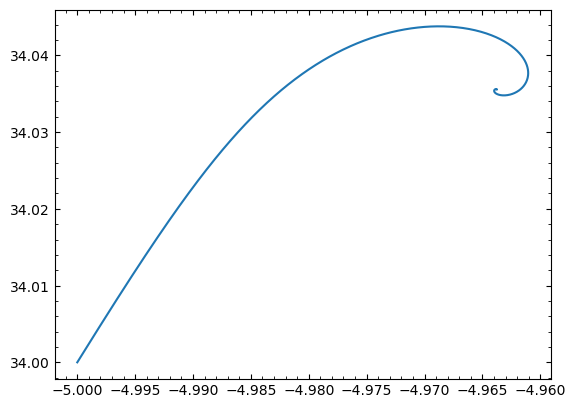

In [97]:
#this is certainly wrong--im treating it as two 2d triangles instead of a 3d prism.
xyangle0=np.arctan2(aim0, dg) 
vx0=v0*np.sin(xyangle0)
vy0=v0*np.cos(xyangle0)
vz0=v0*np.cos(np.radians(theta0))

y0=[dp,dg,0,vx0,vy0,vz0]
print(np.degrees(xyangle0))

omegav=[0.,0,-1] #by the right hand rule

tmax=100

out=integ.solve_ivp(lambda t,y: football_eom(t,y,omegav), (0,tmax), y0, atol=1e-12, rtol=1e-12)
plt.plot(out.y[0], out.y[1])
#right shape but scaling is wayyy off--probably because of my evil fake math (see above). also, 
#my directions are incorrectly defined (positive vs negative position and motion towards the goal is inconsistent)

Now that we have a solution that looks reasonable we can produce some nice plots and verify that a goal was scored.
Produce a nice plot of the trajectory of the ball up until a short time after it crosses the goal line.
*If* your solution is sufficiently accurate you can slice out the appropriate part of the solution for making the plot.
Again include the goal line and goal post in your plot.
Also print the time and $x$ position of the ball when it crosses the goal line.
This we need to have *accurately computed*.
Recall for our choice of coordinate system that $x<0$ if it goes into the goal and that we have chosen a set of units for all of our quantities.

In [ ]:
#i would love to have done any of these; they seem like somethign that's easy to lose a lot of points for not doing and not too hard to do 
#if you have a working function, but i think im being thoroughly held up by whatever the issue with my code above is. not sure why im 
#writing this; i dont know if you give partial credit for qualitative descriptions at all, and this isnt even one. i suppose im desperate

To score a goal the ball must also cross the goal line below the cross bar.
The cross bar is at a height of 8 feet.
(Notice the units!)
Produce another nice plot of the trajectory of the ball in the $yz$-plane including lines for the goal line and the cross bar.
You should find the ball comfortably remained below the cross bar and above the ground for the entire trip to the goal.
(What minimum $z$ makes sense to appear in your plot?)
Print the height of the ball when it crosses the goal line.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Finally, accurately determine the time at which the ball was a maximum distance to the right of the goal post, i.e., how wide was it before it curved back and went into the goal.
Print this time along with the distance to the right of the post and how far it was from the goal line at this time.

(*Note:* The commentator said something about the ball being 2-3 yards to the right of the post, but it is not clear to what they were referring. We have the balls trajectory starting far wider than this, but it never reaches this width due to its curve. Of course they were making up numbers in the moment so we should not take them too literally.)

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

There is much more we could do with this solution but will have to stop here.
We have not taken into account the width of the post, we have very approximate numbers for many of the quantities, we have ignored the wall of players set up to protect the goal, we have considered only one spin, etc.
Further, we have only studied one free kick.
There are many more that would be interesting to try to reproduce, particularly those that fly over the wall, then dip to enter into the goal.

# Turn in the Exam {-}

Turn in the exam on Canvas following the procedure used for the PreLabs and the Computational part of the Midterm Exam.